### Machine Learning

#### Import Libreries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Import CSV and clean for build machine learning tests

In [20]:
# importar csv listo para el estudio
data = pd.read_csv("./data/final_data.csv")
data.isnull().sum()

Unnamed: 0            0
id                    0
subtitle              0
sq_mt_built           0
n_rooms               0
n_bathrooms           0
n_floors              0
raw_address           0
buy_price             0
buy_price_by_area     0
is_renewal_needed     0
is_new_development    0
built_year            0
is_exterior           0
has_garden            0
has_pool              0
has_terrace           0
has_balcony           0
has_parking           0
latitud               0
longitude             0
dtype: int64

In [21]:
data.head()

,Unnamed: 0,id,subtitle,sq_mt_built,n_rooms,n_bathrooms,n_floors,raw_address,buy_price,buy_price_by_area,...,is_new_development,built_year,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_parking,latitud,longitude
0,0,21742,"San Cristóbal, Madrid",64.0,2,1.0,0.0,"Calle de Godella, 64",85000,1328,...,0,1960.0,1,0,0,0,0,0,40.339967,-3.687437
1,1,21741,"Los Ángeles, Madrid",70.0,3,1.0,0.0,Calle de la del Manojo de Rosas,129900,1856,...,0,0.0,1,0,0,1,0,0,40.359340,-3.698374
2,2,21740,"San Andrés, Madrid",94.0,2,2.0,0.0,"Calle del Talco, 68",144247,1535,...,0,0.0,1,0,0,0,0,0,40.344630,-3.715191
3,3,21738,"Los Rosales, Madrid",108.0,2,2.0,0.0,Carretera de Villaverde a Vallecas,260000,2407,...,0,2003.0,1,0,1,0,0,1,40.357722,-3.685029
4,4,21737,"San Andrés, Madrid",126.0,4,2.0,0.0,geologia,195000,1548,...,0,1981.0,1,0,0,1,1,1,40.343389,-3.712416


In [22]:
data = data.drop(columns=['Unnamed: 0',"id","subtitle","raw_address","built_year","buy_price_by_area","n_floors"])

In [23]:
index_lat = data[ (data['latitud'] <= 40.00)].index
index_lat2 = data[ (data['latitud'] >= 41.00)].index

In [24]:
data.drop(index_lat, inplace = True) 
data.drop(index_lat2, inplace = True)

In [25]:
index_lon = data[ (data['longitude'] >= -3.00)].index 
index_lon2 = data[ (data['longitude'] <= -4.00)].index
data.drop(index_lon, inplace = True)
data.drop(index_lon2, inplace = True)

In [26]:
data['sq_mt_built'] = data['sq_mt_built'].astype(int) 
data['n_bathrooms'] = data['n_bathrooms'].astype(int) 

In [27]:
data.head()

,sq_mt_built,n_rooms,n_bathrooms,buy_price,is_renewal_needed,is_new_development,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_parking,latitud,longitude
0,64,2,1,85000,0,0,1,0,0,0,0,0,40.339967,-3.687437
1,70,3,1,129900,1,0,1,0,0,1,0,0,40.359340,-3.698374
2,94,2,2,144247,0,0,1,0,0,0,0,0,40.344630,-3.715191
3,108,2,2,260000,0,0,1,0,1,0,0,1,40.357722,-3.685029
4,126,4,2,195000,0,0,1,0,0,1,1,1,40.343389,-3.712416


##### Narrowing the Data

In [28]:
data = data.drop(data[data["sq_mt_built"]<30].index)
data = data.drop(data[data["n_bathrooms"]<1].index)
data = data.drop(data[data["n_bathrooms"]>5].index)
data = data.drop(data[data["n_rooms"]>5].index)
data = data.drop(data[data["buy_price"]>1000000].index)
data = data.drop(data[data["sq_mt_built"]>400].index)

In [29]:
data.describe()

,sq_mt_built,n_rooms,n_bathrooms,buy_price,is_renewal_needed,is_new_development,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_parking,latitud,longitude
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,97.996416,2.576570,1.582468,353976.580975,0.170089,0.078698,0.823863,0.011424,0.201449,0.415516,0.141417,0.285224,40.423944,-3.675326
std,48.213124,1.047902,0.710434,222669.434430,0.375725,0.269277,0.380951,0.106274,0.401097,0.492829,0.348464,0.451538,0.080461,0.093027
min,30.000000,0.000000,1.000000,39000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.028038,-3.999677
25%,65.000000,2.000000,1.000000,175000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.388788,-3.712316
50%,86.000000,3.000000,1.000000,285000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.422626,-3.691163
75%,120.000000,3.000000,2.000000,485000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,40.453051,-3.655906
max,400.000000,5.000000,5.000000,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.996057,-3.095158


In [30]:
data.shape

(13393, 14)

In [31]:
data.to_csv('./data/bounded_data.csv')

----------------

#### Correlation

In [32]:
from sklearn.linear_model import LinearRegression

<AxesSubplot:>

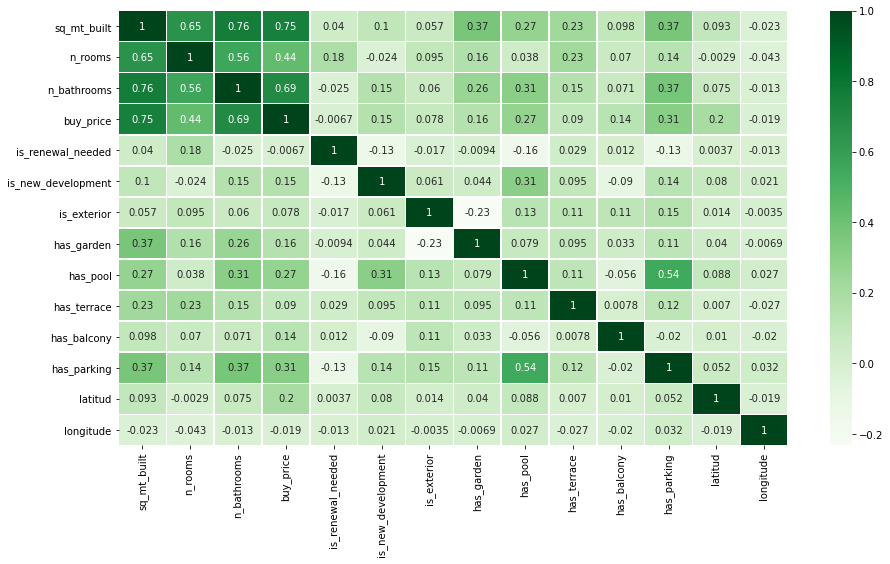

In [33]:
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot = True, linewidth = 0.5, cmap="Greens")

#### Pairplot

Dibujo Pairplot quitando aquellas columnas que solo contienen 0 y 1 (True, False)

In [44]:
data.columns

Index(['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price',
       'is_renewal_needed', 'is_new_development', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_parking', 'latitud',
       'longitude'],
      dtype='object')

In [45]:
df_corr = data[['sq_mt_built','n_rooms','n_bathrooms','buy_price']]

/Users/florengutierrez/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


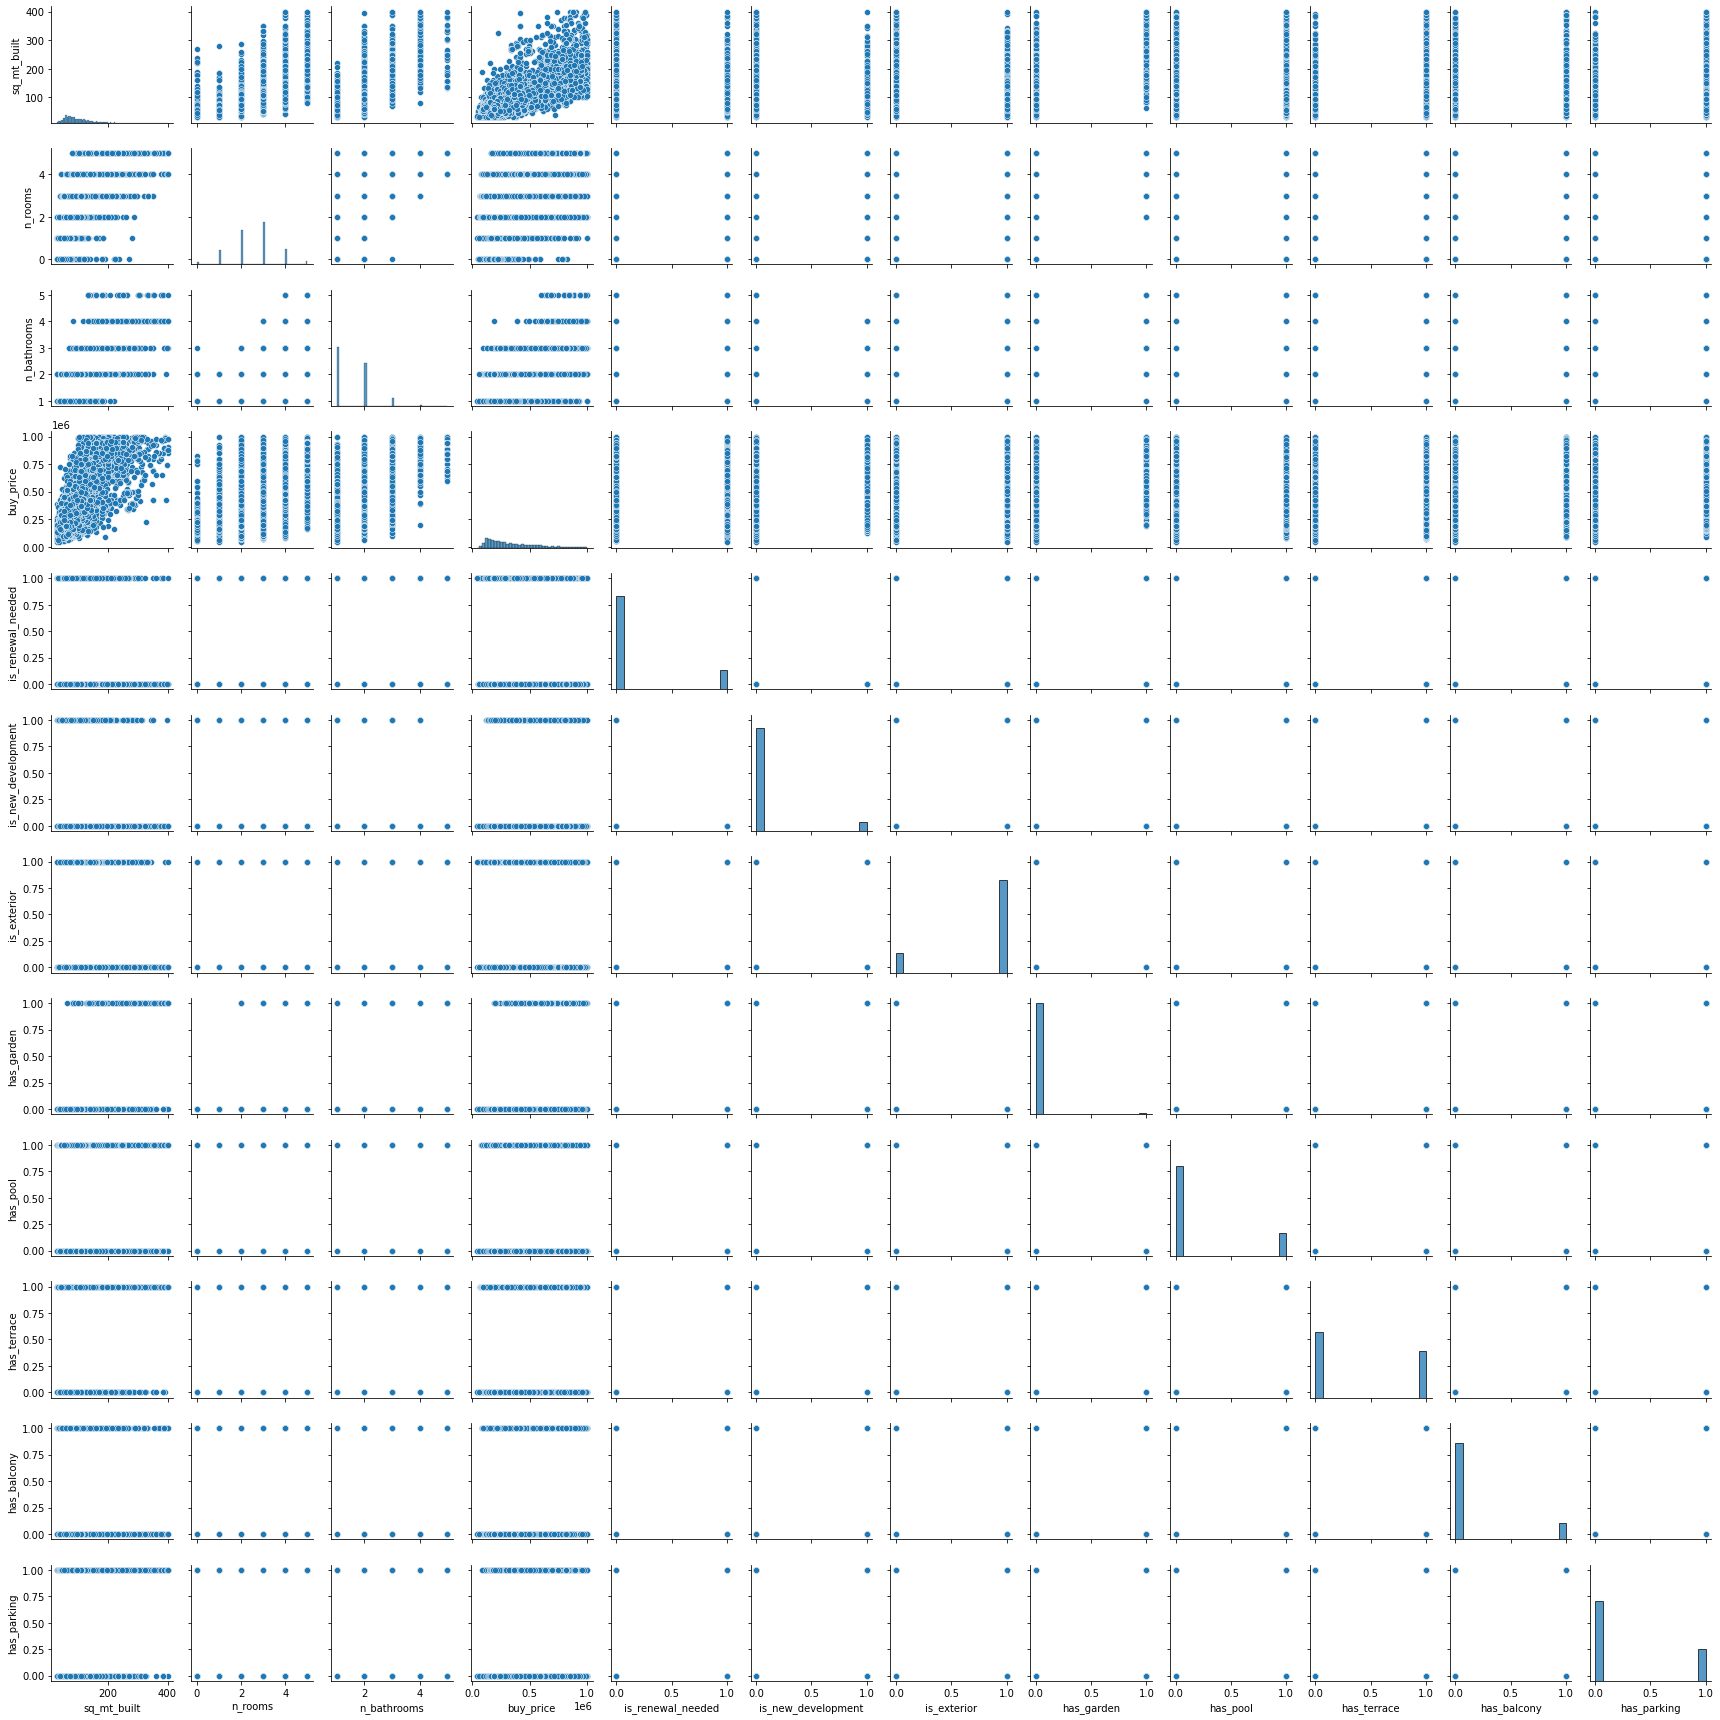

In [46]:
sns.pairplot(df_corr, size=2)
plt.tight_layout()

#### Machine Learning model tests

In [47]:
X = data.drop("buy_price", axis=1) 
y = data["buy_price"].copy()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### Training models

In [49]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


In [50]:
models = {
    "RandomForest" : RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "ExtraTreeReg": ExtraTreesRegressor(),
    "LinearReg": LinearRegression(),
    "Ridge": Ridge(),
    "RidgeCV": RidgeCV(),
    "Lasso": Lasso(),
    "DecisionTreeReg" : DecisionTreeRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),   
    "KNeighborsReg": KNeighborsRegressor(),  
}

In [51]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    print(f"Loading: {name}")
    model.fit(X_train, y_train)
    
    tests = cross_val_score(model,X,y, cv=10, n_jobs=-1)
    print(f"{name} accuracy {np.mean(tests)}")
    print("Test performed")
    print("-"* 45)

Loading: RandomForest
RandomForest accuracy 0.7168484775063628
Test performed
---------------------------------------------
Loading: Bagging
Bagging accuracy 0.6974538227282071
Test performed
---------------------------------------------
Loading: ExtraTreeReg
ExtraTreeReg accuracy 0.6657578644592446
Test performed
---------------------------------------------
Loading: LinearReg
LinearReg accuracy 0.4173699641441592
Test performed
---------------------------------------------
Loading: Ridge
Ridge accuracy 0.41723376043637206
Test performed
---------------------------------------------
Loading: RidgeCV
RidgeCV accuracy 0.4172337578926246
Test performed
---------------------------------------------
Loading: Lasso
Lasso accuracy 0.4173707201504696
Test performed
---------------------------------------------
Loading: DecisionTreeReg
DecisionTreeReg accuracy 0.4545249131977619
Test performed
---------------------------------------------
Loading: GradientBoosting
GradientBoosting accuracy 0.6

##### Root Mean Squared Error

In [52]:
for name, model in models.items():
    print(f"Loading RMSE: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

Loading RMSE: RandomForest
RMSE 79432.18
Loading RMSE: Bagging
RMSE 83602.84
Loading RMSE: ExtraTreeReg
RMSE 90593.59
Loading RMSE: LinearReg
RMSE 136636.39
Loading RMSE: Ridge
RMSE 136608.56
Loading RMSE: RidgeCV
RMSE 136608.56
Loading RMSE: Lasso
RMSE 136635.38
Loading RMSE: DecisionTreeReg
RMSE 106978.49
Loading RMSE: GradientBoosting
RMSE 93864.91
Loading RMSE: KNeighborsReg
RMSE 126127.36


----------------

##### Select best models

Best tests are:  Random Forest, Bagging, Extra Tree Regressor, Gradient Boosting

###### Random Forest

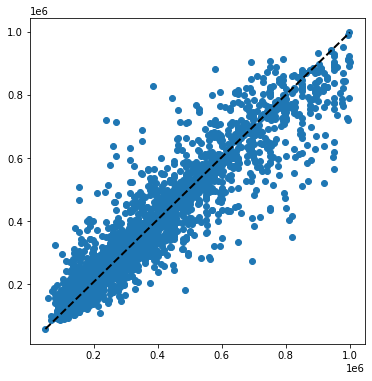

In [53]:
model1 = RandomForestRegressor().fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred1)
plt.plot([y_test.min(), y_test.max()], [y_pred1.min(), y_pred1.max()], 'k--', lw=2)

In [54]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred1)),2))

RMSE 79590.93


----------

###### Bagging

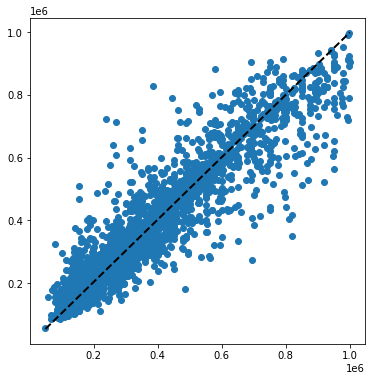

In [55]:
model2 = BaggingRegressor().fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred1)
plt.plot([y_test.min(), y_test.max()], [y_pred2.min(), y_pred2.max()], 'k--', lw=2)

In [56]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred2)),2))

RMSE 83028.12


-----------

###### Extra Tree Regressor.

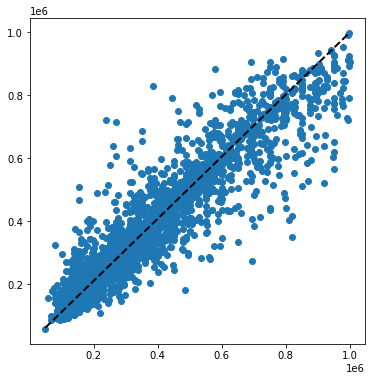

In [57]:
model3 = ExtraTreesRegressor().fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred1)
plt.plot([y_test.min(), y_test.max()], [y_pred3.min(), y_pred3.max()], 'k--', lw=2)

In [58]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred3)),2))

RMSE 89000.98


---------

###### Gradient Boosting

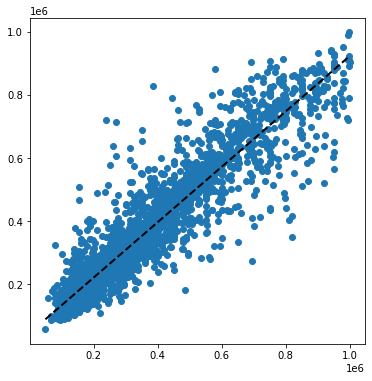

In [59]:
model4 = GradientBoostingRegressor().fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred1)
plt.plot([y_test.min(), y_test.max()], [y_pred4.min(), y_pred4.max()], 'k--', lw=2)

In [60]:
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred4)),2))

RMSE 93864.91


--------

 More accuracy model:  Random Forest Regressor.

----------------

#####  Random Forest Regressor.

GridSearchCV apply

GridSearchCV is a function that comes in Scikit-learn's(or SK-learn) model_selection package. This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set.

In [62]:
from sklearn.model_selection import GridSearchCV

model =  RandomForestRegressor()
params = {'n_estimators': [100, 300],
          'max_features': ['sqrt', 0.5, None],
          'max_depth': [10, 30, 100, None],
          'min_samples_leaf': [1, 3, 10]}

grid_search = GridSearchCV(model, param_grid=params, verbose=1, n_jobs=-1,cv=5)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 100, None],
                         'max_features': ['sqrt', 0.5, None],
                         'min_samples_leaf': [1, 3, 10],
                         'n_estimators': [100, 300]},
             verbose=1)

In [63]:
print(grid_search.best_params_)

{'max_depth': 100, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 300}


In [64]:
print(grid_search.best_score_)

0.8665921850011538


In [66]:
model_final = ExtraTreesRegressor(max_depth=100,max_features=None,min_samples_leaf=1, n_estimators=300).fit(X, y)

In [67]:
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [68]:
import pickle
filename = "data/model_final.sav"
pickle.dump(model_final, open(filename, 'wb'))

------------

In [69]:
data.to_csv('./data/final_data2.csv')

#### Real Test

In [76]:
data.head()

,sq_mt_built,n_rooms,n_bathrooms,buy_price,is_renewal_needed,is_new_development,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_parking,latitud,longitude
0,64,2,1,85000,0,0,1,0,0,0,0,0,40.339967,-3.687437
1,70,3,1,129900,1,0,1,0,0,1,0,0,40.359340,-3.698374
2,94,2,2,144247,0,0,1,0,0,0,0,0,40.344630,-3.715191
3,108,2,2,260000,0,0,1,0,1,0,0,1,40.357722,-3.685029
4,126,4,2,195000,0,0,1,0,0,1,1,1,40.343389,-3.712416


In [71]:
model = pickle.load(open(filename, 'rb'))

In [77]:
example = np.array([[64, 2, 1, 0, 0,1,0,0,0,0,0, 40.339967, -3.687437]])

In [80]:
model.predict(example)

array([85000.])

----------

In [87]:
#ejemplo sacado de idealista, valor: 470.000€

In [88]:
example2 = np.array([[121, 4, 2, 0, 0,0,0,0,1,0,0, 40.4200625, -3.6750591]])

------------

In [89]:
model.predict(example2)

array([467259.16666667])